In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

# Explore Data

In [10]:
df = pd.read_csv('./GSE150150_raw_counts.csv')

In [11]:
columns = ["Trunk E9.5", "Trunk E10.5", "DRG E9.5", "DRG E10.5", "DRG E11.5", "DRG E12.5", "Cranio E12.5"]
idMappings = {
    "SS2_15_0085": "Trunk E9.5",
    "SS2_18_107": "Trunk E10.5",
    "SS2_18_108": "Trunk E10.5",
    "SS2_18_109": "Trunk E10.5",
    "SS2_16_767": "DRG E9.5",
    "SS2_17_435": "DRG E9.5",
    "SS2_16_688": "DRG E10.5",
    "SS2_16_769": "DRG E10.5",
    "SS2_17_432": "DRG E10.5",
    "SS2_17_433": "DRG E10.5",
    "SS2_16_385": "DRG E11.5",
    "SS2_16_384": "DRG E12.5",
    "SS2_15_0073": "Cranio E12.5",
    "SS2_15_0169": "Cranio E12.5"
}

In [12]:
print("Gene Count: ", len(df))
sampleRow = df.sample()
print("Sample Row: ", sampleRow)
print("Sample Gene: ", sampleRow.iloc[0,0])

Gene Count:  24582
Sample Row:          Gene  SS2_15_0073:A9_unique.bam  SS2_15_0073:A8_unique.bam  \
2381  Zc3h15                         99                          8   

      SS2_15_0073:A7_unique.bam  SS2_15_0073:A6_unique.bam  \
2381                         10                         46   

      SS2_15_0073:A5_unique.bam  SS2_15_0073:A4_unique.bam  \
2381                          2                         64   

      SS2_15_0073:A3_unique.bam  SS2_15_0073:A2_unique.bam  \
2381                         34                          1   

      SS2_15_0073:A10_unique.bam  ...  SS2_15_0085:P15_unique.bam  \
2381                          34  ...                          50   

      SS2_15_0085:P16_unique.bam  SS2_15_0085:P17_unique.bam  \
2381                          74                          81   

      SS2_15_0085:P18_unique.bam  SS2_15_0085:P19_unique.bam  \
2381                          45                          46   

      SS2_15_0085:P20_unique.bam  SS2_15_0085:P24_uniqu

In [33]:
import numbers
df.columns = [idMappings[col.split(":")[0]] if col.split(":")[0] in idMappings else col for col in df.columns]
dfParsed = df.groupby(df.columns, axis=1).apply(lambda x: x.mean(axis=1) if isinstance(x.iloc[0,0], numbers.Number) else x.iloc[:,0])
dfParsed = dfParsed[dfParsed.columns[5:].tolist() + dfParsed.columns[:5].tolist()]

print("Grouped Gene Count: ", len(dfParsed))
sampleRow = dfParsed.sample()
print("Grouped Sample Row: ", sampleRow)
print("Grouped Sample Gene: ", sampleRow.iloc[0,0])

Grouped Gene Count:  24582
Grouped Sample Row:        Gene  Trunk E10.5  Trunk E9.5  Cranio E12.5  DRG E10.5   DRG E11.5  \
8524  Ptms    14.732639   18.122396      31.36849  47.098307  134.979167   

       DRG E12.5   DRG E9.5  
8524  107.489583  17.441406  
Grouped Sample Gene:  Ptms


# K-Means Clustering

In [46]:
from sklearn.cluster import KMeans

# Get 5 Random Rows for POC
# sampleDf = df.sample(5)

sampleDf = dfParsed

# X is shape of (24582, 7)
# Getting gene counts across all samples
X = sampleDf.iloc[:,1:].values

# TODO: Elbow method to determine optimal cluster number

kmeans = KMeans(n_clusters=5, random_state=0).fit(X)
print("Cluster Centers: ", kmeans.cluster_centers_)
print("Labels: ", kmeans.labels_)

Cluster Centers:  [[5.72459049e+00 6.21428914e+00 7.33764664e+00 8.12472497e+00
  9.48254231e+00 8.87595119e+00 7.65948110e+00]
 [6.21848177e+03 5.81102865e+03 3.57358724e+03 5.45322982e+03
  8.56351823e+03 8.26549219e+03 6.32161719e+03]
 [1.03198785e+01 3.01899089e+03 7.12492578e+03 2.78392415e+02
  3.77416016e+02 5.22824219e+02 6.45032227e+02]
 [4.53867187e+02 4.86056526e+02 5.25212086e+02 9.73963427e+02
  1.37891697e+03 1.12740947e+03 6.34526271e+02]
 [8.54013296e+01 1.22120309e+02 1.25043590e+02 1.30897494e+02
  1.55010580e+02 1.39346354e+02 1.34442169e+02]]
Labels:  [2 4 4 ... 0 0 0]


In [47]:
unique, counts = np.unique(kmeans.labels_, return_counts=True)
print("Label Counts: ", dict(zip(unique, counts)))


Label Counts:  {0: 23760, 1: 1, 2: 4, 3: 17, 4: 800}


/usr/local/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


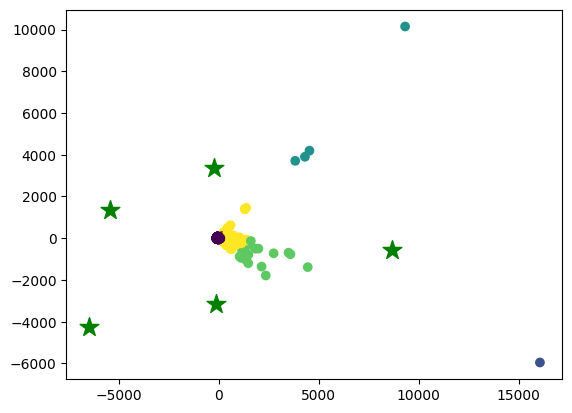

In [48]:
from sklearn.manifold import TSNE

# TODO: Better understand TSNE/PCA and how to best visualize clusters

tsne = TSNE(n_components=2, random_state=0, learning_rate=200, init='pca')
X_tsne = tsne.fit_transform(X)
cluster_tsne = tsne.fit_transform(kmeans.cluster_centers_)

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=kmeans.labels_)
plt.scatter(cluster_tsne[:, 0], cluster_tsne[:, 1], marker='*', s=200, c='green')
plt.show()


In [ ]:
# TODO: Pull key genes from study and see if they belong in the same cluster

# TODO: Draw conclusions from the identified clusters and evaluate the clustering algorithm, see if there are any contradictions